In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import base64  
import pandas as pd  
from IPython.display import HTML
from numpy import asarray
from numpy import savetxt
import pickle

In [2]:
df = pd.read_csv("all_wells_dbscan.csv")
df.head()

,WELL,DEPT,d,GR,RHOB,NPHI,DT,CALI,RESI
0,BREAKER-1,710.1,710.1,108.654,2.13,61.64,158.0,9.077,0.590
1,BREAKER-1,710.7,710.7,99.889,2.15,50.45,152.9,9.782,0.988
2,BREAKER-1,711.5,711.5,116.795,2.14,62.38,152.4,8.687,0.714
3,BREAKER-1,711.6,711.6,114.532,2.14,63.24,155.6,8.687,0.751
4,BREAKER-1,712.2,712.2,122.552,2.12,61.74,157.5,8.651,0.606


In [3]:
df.describe()

,DEPT,d,GR,RHOB,NPHI,DT,CALI,RESI
count,124960.000000,124960.000000,124960.000000,124960.000000,124960.000000,124960.000000,124960.000000,124960.000000
mean,3773.618305,1816.570587,126.127641,2.453285,34.141154,89.538167,28.703589,4.027979
std,3194.368260,477.168198,38.553550,0.123275,13.217229,15.204283,60.109550,13.434364
min,0.000000,473.200000,16.343750,2.010000,1.196289,54.289060,7.485352,0.300000
25%,1619.800000,1474.200000,104.953100,2.375000,22.400000,79.100000,8.561400,1.630000
50%,2257.600000,1815.600000,136.780000,2.461000,35.449110,86.900000,8.624000,2.630000
75%,5519.250000,2176.800000,154.674500,2.541000,43.980000,96.890000,12.360000,4.196503
max,14047.000000,2944.900000,453.654000,2.800000,87.410000,158.400000,279.145000,2000.000000


In [4]:
names = df["WELL"]
size = len(df["WELL"])

lineCount = 0
indexes = []
for i in range(size - 1):
  name = names[i]
  if name == names[i+1]:
    lineCount += 1
  else:
    indexes.append(lineCount)

In [5]:
wellFrames = df.WELL.unique()

print(len(wellFrames))
print(wellFrames)
print(len(indexes))
print(indexes)
well_names=wellFrames.copy()


indexes = [ 4758, 20301, 33625, 35152, 49059, 60024, 66632, 80627, 91673, 102984, 114394]

12
['BREAKER-1' 'LEE_1_008' 'LEE_2_006' 'BOYD_1_LWD_180_674'
 'JOSEPHIINE_1_LWD_690_2675' 'TEEWINOT_1_LWD_472_2252'
 'NORTH_HARRIET_1_004.ASC' 'NORTH_GIPSY_1_003'
 'MISTINGUETT_1_LWD_649_2352' 'MONTY_1_LWD_61_2492' 'CHERVIL_1_WL_39_2661'
 'NORTH_HERALD_1_WL_47_2608']
11
[4756, 20298, 33621, 35147, 49053, 60017, 66624, 80618, 91663, 102973, 114382]


In [6]:
for i in range(len(wellFrames)):
  if i == 0:
    wellFrames[i] = df[:indexes[i]-1]
  elif i == len(wellFrames) - 1:
    wellFrames[i] = df[indexes[i-1]:]
  else:
    wellFrames[i] = df[indexes[i-1]:indexes[i]-1]
    

trainSet =  pd.concat([wellFrames[0],wellFrames[1],wellFrames[2],wellFrames[3],
                       wellFrames[5],wellFrames[6],wellFrames[7],wellFrames[8],
                       wellFrames[10],wellFrames[11]], ignore_index=True) #train with first 4 wells                   
                       
                       
trainSet.describe()






,DEPT,d,GR,RHOB,NPHI,DT,CALI,RESI
count,99733.000000,99733.000000,99733.00000,99733.000000,99733.000000,99733.000000,99733.000000,99733.000000
mean,3812.244920,1790.777417,122.79760,2.449222,34.021787,90.116184,9.909622,3.909993
std,3264.049684,496.666066,38.00375,0.129172,13.235495,16.144102,2.027321,13.914668
min,1.000000,473.300000,16.34375,2.010000,1.196289,54.289060,7.485352,0.300000
25%,1597.100000,1437.800000,100.28600,2.365723,21.936040,78.820000,8.551000,1.509737
50%,2246.000000,1786.700000,132.11000,2.460000,35.581000,86.930000,8.616900,2.500000
75%,5643.000000,2159.400000,151.06000,2.543000,44.040000,97.690000,12.277000,4.170000
max,14047.000000,2944.900000,453.65400,2.800000,87.410000,158.400000,21.722660,2000.000000


In [7]:
input_X = trainSet[['RHOB','RESI','GR','NPHI']].values #RHOB	NPHI	RESI GR
input_y = trainSet['DT'].values

print(input_X.shape)

X_train, X_test, y_train, y_test = train_test_split(input_X, input_y, random_state=0, test_size=0.20)

print(f"All Data:        {len(input_X)} values")
print(f"Training data:   {len(X_train)} values")
print(f"Testing data:    {len(X_test)}  values")

X_train_scaler = MinMaxScaler()
y_train_scaler = MinMaxScaler()
X_train_norm = X_train_scaler.fit_transform(X_train)
y_train_norm = y_train_scaler.fit_transform(y_train.reshape(-1,1))

X_test_norm = X_train_scaler.transform(X_test)
y_test_norm = y_train_scaler.transform(y_test.reshape(-1,1))

# denormalize 
X_train_denorm = X_train_scaler.inverse_transform(X_train_norm)
y_train_denorm = y_train_scaler.inverse_transform(y_train_norm)

y_train_norm = np.squeeze(y_train_norm)




(99733, 4)
All Data:        99733 values
Training data:   79786 values
Testing data:    19947  values


In [8]:
X_train_norm.shape

(79786, 4)

In [9]:
%%time
#Import Random Forest Model
from sklearn.ensemble import RandomForestRegressor

#Create a Gaussian Classifier
rfr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=False,
                      verbose=False, warm_start=False)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfr.fit(X_train_norm,y_train_norm)



CPU times: user 6.14 s, sys: 32.5 ms, total: 6.18 s
Wall time: 6.25 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=False,
                      verbose=False, warm_start=False)

In [10]:
print(rfr.feature_importances_)

[0.0966667  0.45674518 0.01298586 0.43360226]


In [11]:
y_pred=rfr.predict(X_test_norm)

In [12]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

# Model Accuracy, how often is the classifier correct?
print("Mean Squared Error       : ",metrics.mean_squared_error(y_test_norm, y_pred))
#print("Max Error                : ",metrics.max_error(y_test_norm, y_pred))
print("R2 Score                 : ",metrics.r2_score(y_test_norm, y_pred))
print("Explained Variance Error : ",metrics.explained_variance_score(y_test_norm, y_pred))
# print("Mean absolute percentage error : ", np.mean(np.abs((y_test_norm - y_pred) / y_test_norm)) * 100)

# print(metrics.classification_report(y_test, y_pred))

Mean Squared Error       :  0.002400356837056837
R2 Score                 :  0.9017924133781668
Explained Variance Error :  0.9017949827119361


In [15]:
# save the models to the disk

pickle.dump (X_train_scaler, open('rfr_model.X_scaler', 'wb'))
pickle.dump (y_train_scaler, open('rfr_model.y_scaler', 'wb'))
pickle.dump (rfr, open('rfr_model', 'wb'))


In [16]:
blind_wells = ['JOSEPHIINE_1_LWD_690_2675','MONTY_1_LWD_61_2492']


In [19]:
%%time
# DEPT	d	GR	RHOB	NPHI	DT	CALI	RESI


# Running the model in the scaled data

def pred_rfr(well_string):
    idx=int(np.where(well_names == well_string)[0])
    X_well = wellFrames[idx][['RHOB','RESI','GR','NPHI']].values
    X_well_norm = X_train_scaler.transform(X_well)
    depth_well = wellFrames[idx]['d'].values
    y_well = wellFrames[idx]['DT'].values
    y_well_norm = y_train_scaler.transform(y_well.reshape(-1,1))
    y_pred_well = rfr.predict(X_well_norm)

    y_pred_well = y_train_scaler.inverse_transform(y_pred_well.reshape((-1, 1)))

    print('\n'*3)
    print("-"*20, well_string, "-"*20)
    print("Mean Squared Error       : ",metrics.mean_squared_error(y_well, y_pred_well))
    #print("Max Error                : ",metrics.max_error(y_well_norm, y_pred_well))
    print("R2 Score                 : ",metrics.r2_score(y_well, y_pred_well))
    print("Explained Variance Error : ",metrics.explained_variance_score(y_well, y_pred_well))
    #print("Mean absolute percentage error : ", np.mean(np.abs((y_well - y_pred_well) / y_well_norm)) * 100)
    print("Mean absolute error      : ",metrics.mean_absolute_error(y_well, y_pred_well))
    print('\n')


#     plt.figure(figsize=(10,20))
#     #plt.subplot(121)
#     plt.plot(y_well,-depth_well, 'k', label='True DT')
#     plt.plot(y_pred_well, -depth_well, 'g--', label = 'Predicted DT')
#     plt.xlabel('Velocity',fontsize=16)           # . . X label
#     plt.ylabel('Depth ',fontsize=16)  # . . Y label
#     plt.title(well_string)
#     plt.legend()
#     plt.tight_layout()
#     plt.show()

#     return y_pred_well




for well in blind_wells:
    pred_rfr(well)
  





-------------------- JOSEPHIINE_1_LWD_690_2675 --------------------
Mean Squared Error       :  19.199066035544725
R2 Score                 :  0.8615425743708098
Explained Variance Error :  0.8619724019090392
Mean absolute error      :  3.2977920596783252






-------------------- MONTY_1_LWD_61_2492 --------------------
Mean Squared Error       :  17.20321874961124
R2 Score                 :  0.7518399804988168
Explained Variance Error :  0.7653855791222153
Mean absolute error      :  3.0671987846494035


CPU times: user 70.3 ms, sys: 4.72 ms, total: 75 ms
Wall time: 74.2 ms


In [20]:


# Running the model without scaler



# rfr.fit(X_train,y_train)

# def pred_rfr_nn(well_string):
#     idx=int(np.where(well_names == well_string)[0])
#     X_well_norm = wellFrames[idx][['RHOB','RESI','GR','NPHI']].values
#     # X_well_norm = X_train_scaler.transform(X_well)
#     depth_well = wellFrames[idx]['DEPT'].values
#     y_well_norm = wellFrames[idx]['DT'].values
#     # y_well_norm = y_train_scaler.transform(y_well.reshape(-1,1))
#     y_pred_well = rfr.predict(X_well_norm)

#     print('\n'*3)
#     print("-"*20, well_string, "-"*20)
#     print("Mean Squared Error       : ",metrics.mean_squared_error(y_well_norm, y_pred_well))
#     print("Max Error                : ",metrics.max_error(y_well_norm, y_pred_well))
#     print("R2 Score                 : ",metrics.r2_score(y_well_norm, y_pred_well))
#     print("Explained Variance Error : ",metrics.explained_variance_score(y_well_norm, y_pred_well))
#     #print("Mean absolute percentage error : ", np.mean(np.abs((y_well_norm - y_pred_well) / y_well_norm)) * 100)
#     print("Mean absolute error      : ",metrics.mean_absolute_error(y_well_norm, y_pred_well))
#     print('\n')
    
#     plt.figure(figsize=(10,20))
#     #plt.subplot(121)
#     plt.plot(y_well_norm,-depth_well, 'k', label='True DT')
#     plt.plot(y_pred_well, -depth_well, 'g--', label = 'Predicted DT')
#     plt.xlabel('Velocity',fontsize=16)           # . . X label
#     plt.ylabel('Depth ',fontsize=16)  # . . Y label
#     plt.title(well_string)
#     plt.legend()
#     plt.tight_layout()
#     plt.show()

#     return depth_well, y_well_norm, y_pred_well




# for well in blind_wells:
#     pred_rfr_nn(well)



In [21]:
# def rfr_model(X, y):
#     # Perform Grid-Search
#     gsc = GridSearchCV(
#         estimator=RandomForestRegressor(),
#         param_grid={
#             'max_depth': range(5,15),
#             'n_estimators': (10, 50, 100, 1000),
#             'min_samples_split': (2,4,10,20),
#         },
#         cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    
#     grid_result = gsc.fit(X, y)
#     best_params = grid_result.best_params_
    
#     rfr = RandomForestRegressor(max_depth=best_params["max_depth"],
#                                 n_estimators=best_params["n_estimators"],
#                                 min_samples_split=best_params["min_samples_split"],
#                                 random_state=False, verbose=False)
#     return gsc.cv_results_, rfr

In [22]:
# Grid Search result

# rfr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
#                       max_features='auto', max_leaf_nodes=None,
#                       min_impurity_decrease=0.0, min_impurity_split=None,
#                       min_samples_leaf=1, min_samples_split=4,
#                       min_weight_fraction_leaf=0.0, n_estimators=50,
#                       n_jobs=None, oob_score=False, random_state=False,
#                       verbose=False, warm_start=False)





-------------------- JOSEPHIINE_1_LWD_690_2675 --------------------
Mean Squared Error       :  19.199066035544725
R2 Score                 :  0.8615425743708098
Explained Variance Error :  0.8619724019090392
Mean absolute error      :  3.2977920596783252




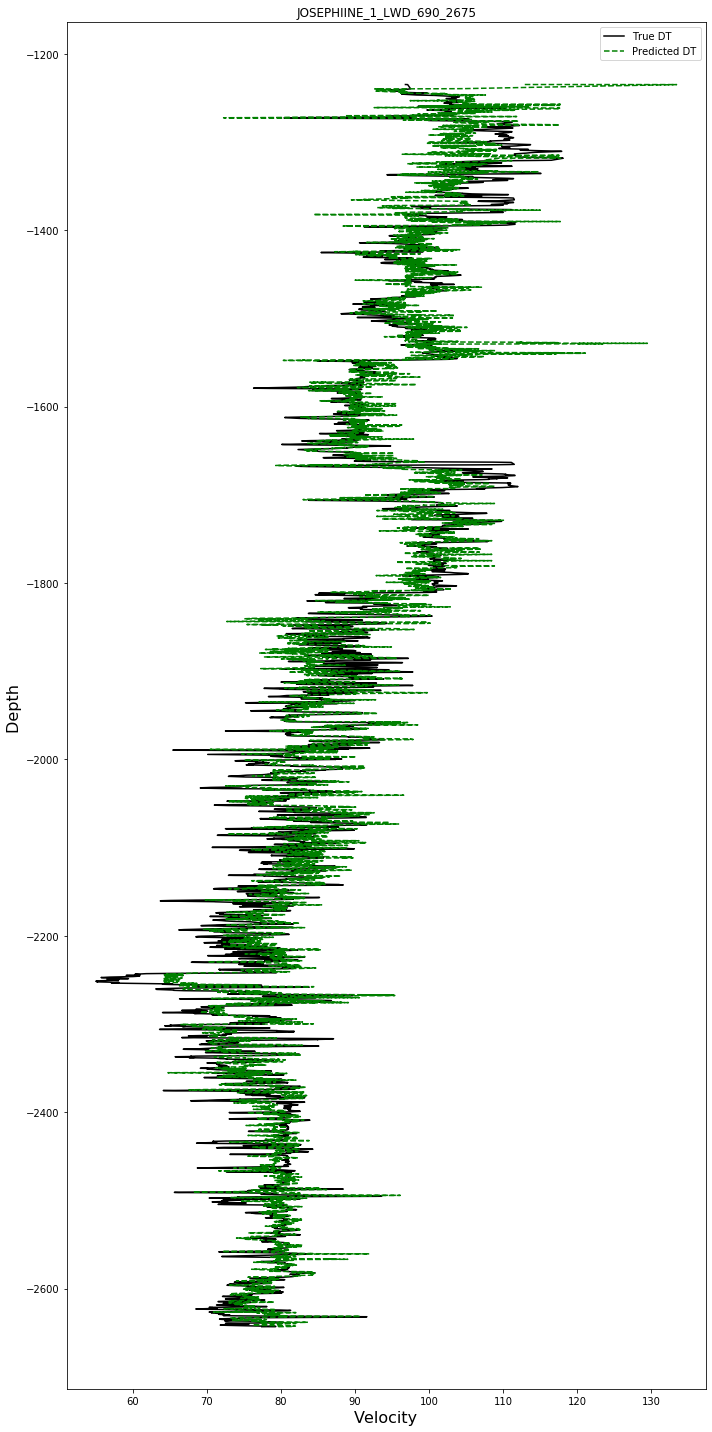





-------------------- MONTY_1_LWD_61_2492 --------------------
Mean Squared Error       :  17.20321874961124
R2 Score                 :  0.7518399804988168
Explained Variance Error :  0.7653855791222153
Mean absolute error      :  3.0671987846494035




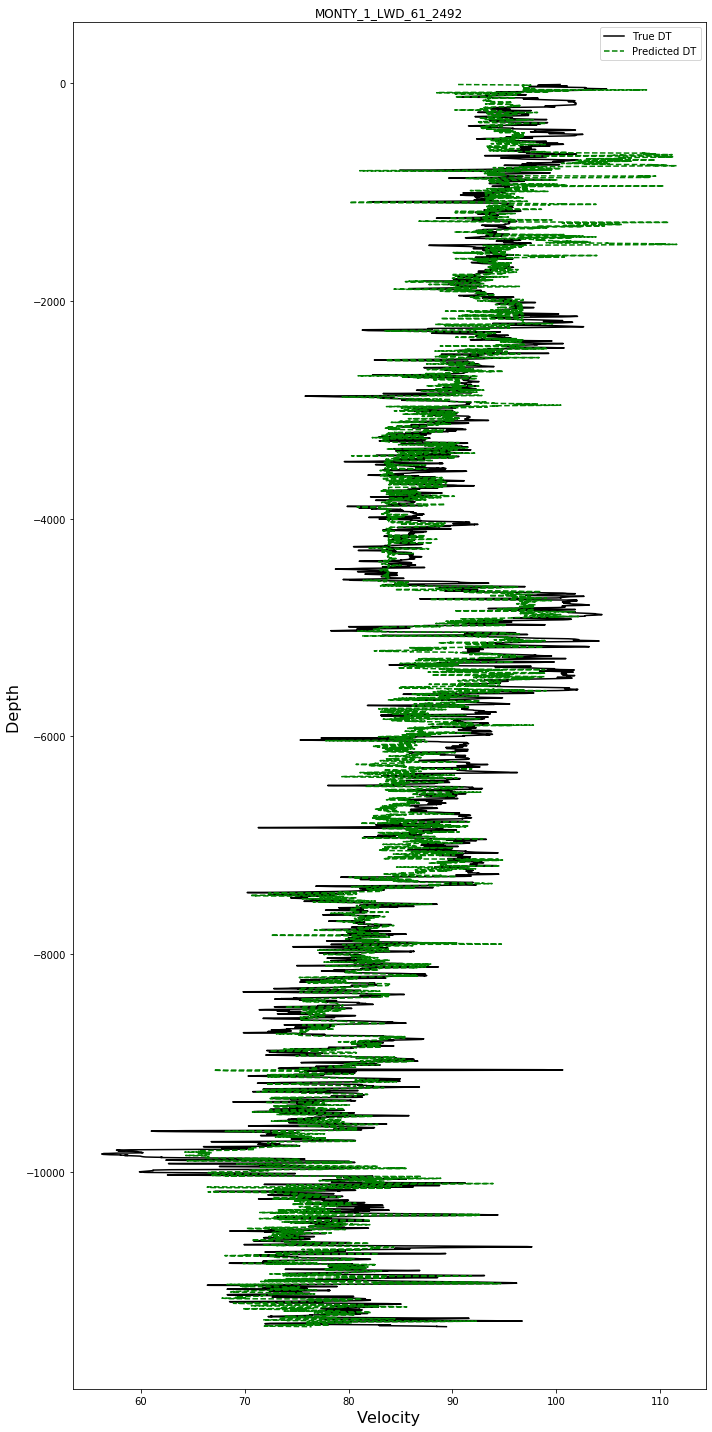

In [23]:

## Load and test the model.. (to check if it is working)

X_train_scaler_loaded = pickle.load(open('rfr_model.X_scaler', 'rb'))
y_train_scaler_loaded = pickle.load(open('rfr_model.y_scaler', 'rb'))
rfr_loaded = pickle.load(open('rfr_model', 'rb'))


# rfr_loaded.fit(X_train_norm,y_train_norm)

def pred_rfr(well_string):
    idx=int(np.where(well_names == well_string)[0])
    X_well = wellFrames[idx][['RHOB','RESI','GR','NPHI']].values
    X_well_norm = X_train_scaler_loaded.transform(X_well)
    depth_well = wellFrames[idx]['DEPT'].values
    y_well = wellFrames[idx]['DT'].values
    y_well_norm = y_train_scaler_loaded.transform(y_well.reshape(-1,1))
    y_pred_well = rfr_loaded.predict(X_well_norm)

    #y_pred_well = np.squeeze(y_pred_well)
    #y_pred_well = y_pred_well.reshape((-1, 1))
    y_pred_well = y_train_scaler_loaded.inverse_transform(y_pred_well.reshape((-1, 1)))

    print('\n'*3)
    print("-"*20, well_string, "-"*20)
    print("Mean Squared Error       : ",metrics.mean_squared_error(y_well, y_pred_well))
    #print("Max Error                : ",metrics.max_error(y_well_norm, y_pred_well))
    print("R2 Score                 : ",metrics.r2_score(y_well, y_pred_well))
    print("Explained Variance Error : ",metrics.explained_variance_score(y_well, y_pred_well))
    #print("Mean absolute percentage error : ", np.mean(np.abs((y_well - y_pred_well) / y_well_norm)) * 100)
    print("Mean absolute error      : ",metrics.mean_absolute_error(y_well, y_pred_well))
    print('\n')


    plt.figure(figsize=(10,20))
    #plt.subplot(121)
    plt.plot(y_well,-depth_well, 'k', label='True DT')
    plt.plot(y_pred_well, -depth_well, 'g--', label = 'Predicted DT')
    plt.xlabel('Velocity',fontsize=16)           # . . X label
    plt.ylabel('Depth ',fontsize=16)  # . . Y label
    plt.title(well_string)
    plt.legend()
    plt.tight_layout()
    plt.show()

    return depth_well, y_well_norm, y_pred_well



for well in blind_wells:
    pred_rfr(well)
